## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [6]:
df1 = pd.read_csv("QueryResults-2.csv")
df=df1.rename({'m': 'DATE', 'TagName': 'TAG', 'Unnamed: 2': 'POSTS'}, axis=1)
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,507
4,2008-08-01 00:00:00,c++,164


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [6]:
df.tail()

,DATE,TAG,POSTS
2267,2022-03-01 00:00:00,php,4217
2268,2022-03-01 00:00:00,python,25788
2269,2022-03-01 00:00:00,r,5197
2270,2022-03-01 00:00:00,ruby,546
2271,2022-03-01 00:00:00,swift,2179


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [ ]:
df.shape

(2272, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [7]:
df.count(axis='rows')

DATE     2272
TAG      2272
POSTS    2272
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [22]:
df.groupby(by='TAG').sum().sort_values('POSTS', ascending=False)

,POSTS
TAG,
javascript,2351332
python,1914475
java,1834127
c#,1528775
php,1430548
c++,758545
r,441867
c,376557
swift,310618


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [28]:
df.groupby(by='TAG').count().sort_values('POSTS')

,DATE,POSTS
TAG,,
go,149,149
swift,156,156
r,162,162
assembly,164,164
c,164,164
c++,164,164
delphi,164,164
java,164,164
javascript,164,164


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [8]:
df.DATE=pd.to_datetime(df.DATE)
# new_df = df['01-01-2019' > df['DATE'] > '01-01-2015']
new_df= df.loc[(df['DATE'] > "2020-01-01") & (df['DATE'] < "2021-01-01")]
print(new_df)
df.DATE.dt.strftime('%d-%m-%Y')

           DATE       TAG  POSTS
1908 2020-02-01  assembly    273
1909 2020-02-01         c   1985
1910 2020-02-01        c#   7718
1911 2020-02-01       c++   4097
1912 2020-02-01    delphi    156
...         ...       ...    ...
2057 2020-12-01       php   4817
2058 2020-12-01    python  22284
2059 2020-12-01         r   4347
2060 2020-12-01      ruby    503
2061 2020-12-01     swift   2108

[154 rows x 3 columns]


0       01-07-2008
1       01-08-2008
2       01-08-2008
3       01-08-2008
4       01-08-2008
           ...    
2267    01-03-2022
2268    01-03-2022
2269    01-03-2022
2270    01-03-2022
2271    01-03-2022
Name: DATE, Length: 2272, dtype: object

In [35]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,507
4,2008-08-01,c++,164


In [9]:

new_df.groupby(by='TAG').sum().sort_values('POSTS', ascending=False)

,POSTS
TAG,
python,265705
javascript,198566
java,110793
c#,79976
php,60374
r,55875
c++,54084
swift,30747
c,27633


## Data Manipulation



In [49]:
reshaped_df = df.pivot(index='DATE' , columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,507.0,164.0,14.0,NaN,222.0,164.0,28.0,160.0,121.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,NaN
2008-10-01,15.0,303.0,1990.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,508.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,580.0,97.0,502.0,452.0,1.0,159.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01,311.0,2340.0,6389.0,4168.0,151.0,702.0,8276.0,15842.0,81.0,4131.0,23396.0,4624.0,449.0,1762.0
2021-12-01,287.0,2266.0,5723.0,3870.0,159.0,771.0,7545.0,15306.0,103.0,3741.0,22068.0,3924.0,434.0,1666.0
2022-01-01,241.0,2070.0,5929.0,3894.0,151.0,794.0,7735.0,16338.0,131.0,4036.0,22692.0,4265.0,477.0,1999.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [51]:
reshaped_df.shape


(165, 14)

In [52]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [53]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,507.0,164.0,14.0,NaN,222.0,164.0,28.0,160.0,121.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,NaN
2008-10-01,15.0,303.0,1990.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,508.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,580.0,97.0,502.0,452.0,1.0,159.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [54]:
reshaped_df.fillna(0, inplace=True)
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,507.0,164.0,14.0,0.0,222.0,164.0,28.0,160.0,121.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1648.0,754.0,105.0,0.0,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,0.0
2008-10-01,15.0,303.0,1990.0,810.0,112.0,0.0,1154.0,726.0,127.0,615.0,508.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,580.0,97.0,502.0,452.0,1.0,159.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01,311.0,2340.0,6389.0,4168.0,151.0,702.0,8276.0,15842.0,81.0,4131.0,23396.0,4624.0,449.0,1762.0
2021-12-01,287.0,2266.0,5723.0,3870.0,159.0,771.0,7545.0,15306.0,103.0,3741.0,22068.0,3924.0,434.0,1666.0
2022-01-01,241.0,2070.0,5929.0,3894.0,151.0,794.0,7735.0,16338.0,131.0,4036.0,22692.0,4265.0,477.0,1999.0


In [56]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

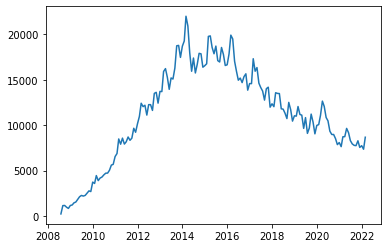

In [60]:
java = df[df.TAG == 'java']
plt.plot(java['DATE'], java['POSTS'])

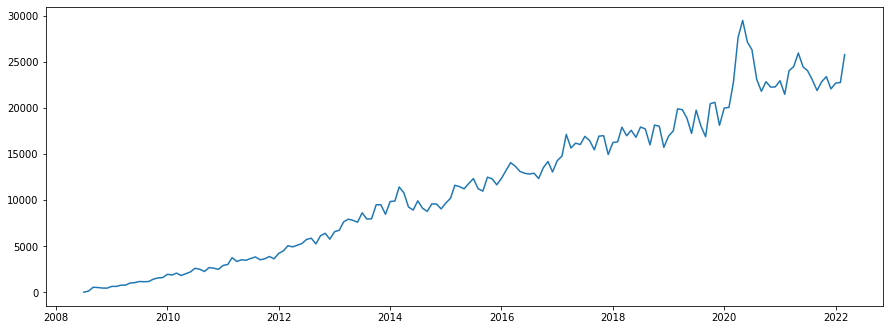

In [68]:
plt.plot(reshaped_df.index, reshaped_df['python'])
plt.rcParams["figure.figsize"] = (15,10)

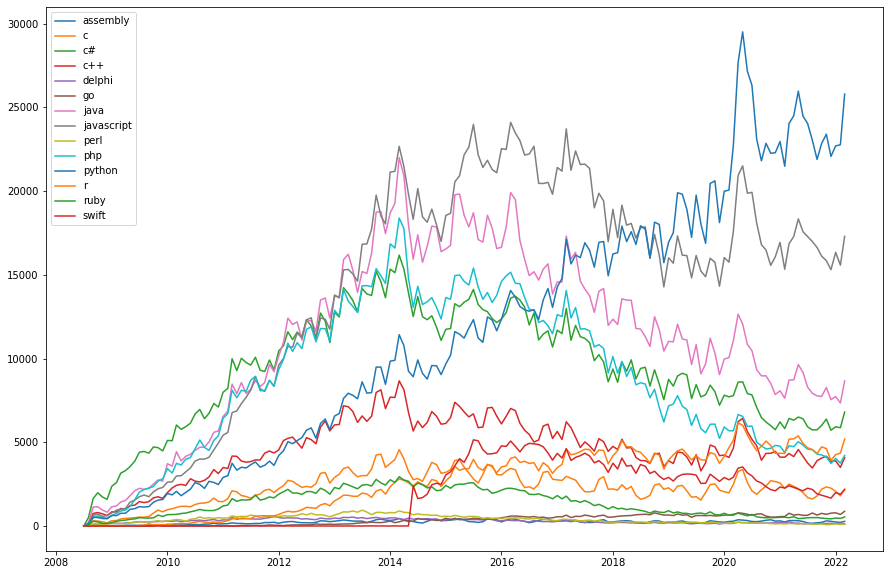

In [72]:

for column in reshaped_df.columns: 
  plt.plot(reshaped_df.index, reshaped_df[column], label = reshaped_df[column].name)
  plt.legend(fontsize=10)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

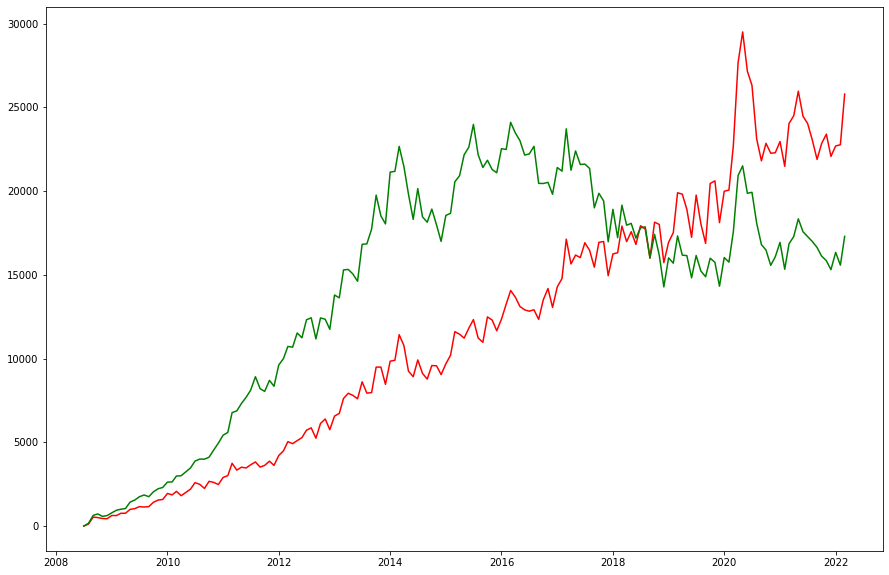

In [69]:
plt.plot(reshaped_df.index, reshaped_df['python'], color = 'r')
plt.plot(reshaped_df.index, reshaped_df['javascript'], color = 'g')
plt.rcParams["figure.figsize"] = (15,10)
plt.show()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

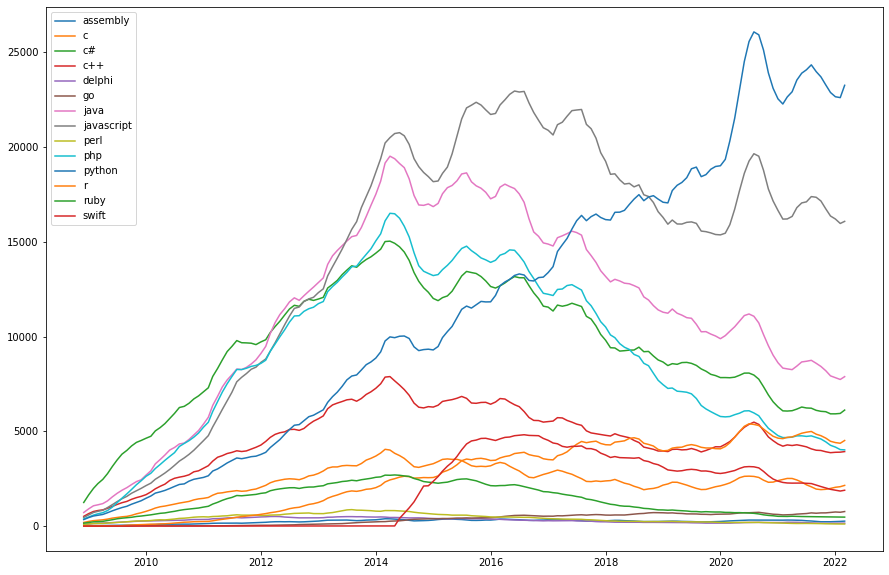

In [73]:
roll_df = reshaped_df.rolling(window=6).mean()
for column in roll_df.columns: 
  plt.plot(roll_df.index, roll_df[column], label = roll_df[column].name)
  plt.legend(fontsize=10)

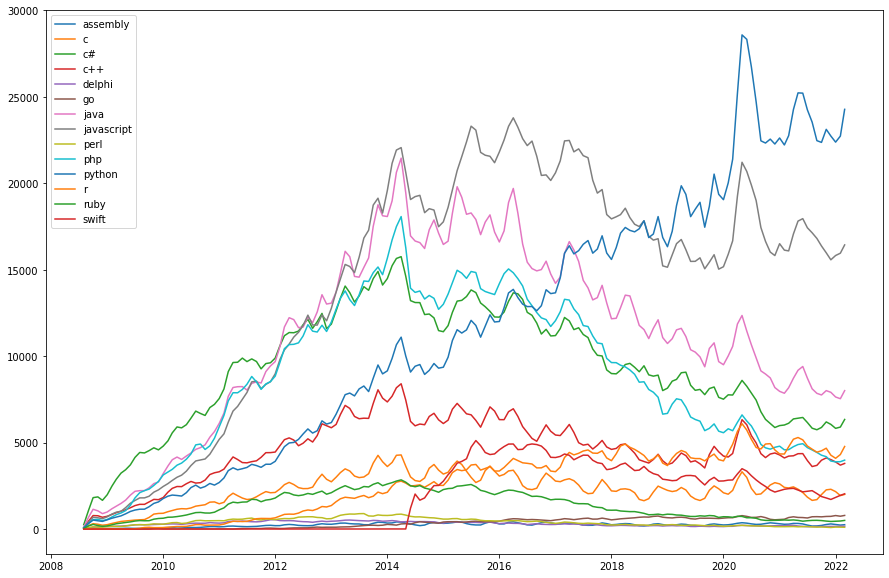

In [74]:
roll_df = reshaped_df.rolling(window=2).mean()
for column in roll_df.columns: 
  plt.plot(roll_df.index, roll_df[column], label = roll_df[column].name)
  plt.legend(fontsize=10)

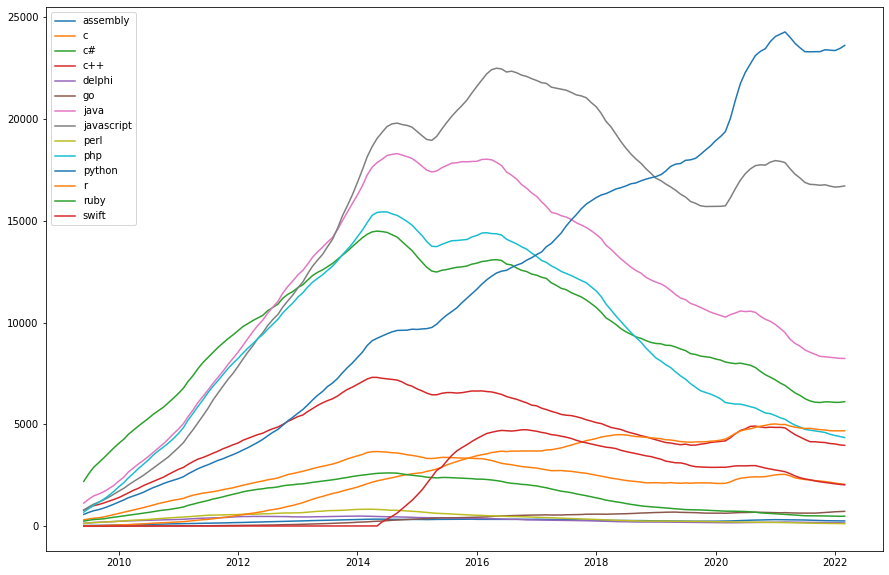

In [75]:
roll_df = reshaped_df.rolling(window=12).mean()
for column in roll_df.columns: 
  plt.plot(roll_df.index, roll_df[column], label = roll_df[column].name)
  plt.legend(fontsize=10)